In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv(r"C:\Users\matin\RF for Soil Health\Soil Fertility Data (Modified Data).csv")

print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (1288, 13)


,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82,0


In [3]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          1288 non-null   int64  
 1   P          1288 non-null   float64
 2   K          1288 non-null   int64  
 3   ph         1288 non-null   float64
 4   ec         1288 non-null   float64
 5   oc         1288 non-null   float64
 6   S          1288 non-null   float64
 7   zn         1288 non-null   float64
 8   fe         1288 non-null   float64
 9   cu         1288 non-null   float64
 10  Mn         1288 non-null   float64
 11  B          1288 non-null   float64
 12  fertility  1288 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 130.9 KB


In [4]:
data.isnull().sum()


N            0
P            0
K            0
ph           0
ec           0
oc           0
S            0
zn           0
fe           0
cu           0
Mn           0
B            0
fertility    0
dtype: int64

In [5]:
# Fill numerical columns with mean
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Fill categorical columns with mode
cat_cols = data.select_dtypes(include="object").columns
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


In [7]:
target_column = "fertility"  # change if needed

le = LabelEncoder()
data[target_column] = le.fit_transform(data[target_column])

print("Fertility Classes:", le.classes_)


Fertility Classes: [0 1 2]


In [8]:
X = data.drop(columns=[target_column])
y = data[target_column]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1288, 12)
Target shape: (1288,)


In [9]:
# 70% Train, 15% Validation, 15% Test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (901, 12)
Validation: (193, 12)
Test: (194, 12)


In [10]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [11]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
val_pred = rf_model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_pred))
print("Classification Report:\n", classification_report(y_val, val_pred))


Validation Accuracy: 0.9015544041450777
Confusion Matrix:
 [[54  6  0]
 [ 8 53  5]
 [ 0  0 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89        60
           1       0.90      0.80      0.85        66
           2       0.93      1.00      0.96        67

    accuracy                           0.90       193
   macro avg       0.90      0.90      0.90       193
weighted avg       0.90      0.90      0.90       193



In [13]:
test_pred = rf_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))
print("Classification Report:\n", classification_report(y_test, test_pred))


Test Accuracy: 0.9742268041237113
Confusion Matrix:
 [[57  4  0]
 [ 1 65  0]
 [ 0  0 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96        61
           1       0.94      0.98      0.96        66
           2       1.00      1.00      1.00        67

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194



In [14]:
y_test_pred = rf_model.predict(X_test)


In [15]:
comparison_df = pd.DataFrame({
    "Actual Fertility": le.inverse_transform(y_test),
    "Predicted Fertility": le.inverse_transform(y_test_pred)
})

comparison_df.head(10)


,Actual Fertility,Predicted Fertility
0,1,1
1,0,0
2,2,2
3,1,1
4,2,2
5,2,2
6,0,0
7,2,2
8,0,0
9,2,2


In [16]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Final Test Accuracy:", accuracy)



Final Test Accuracy: 0.9742268041237113


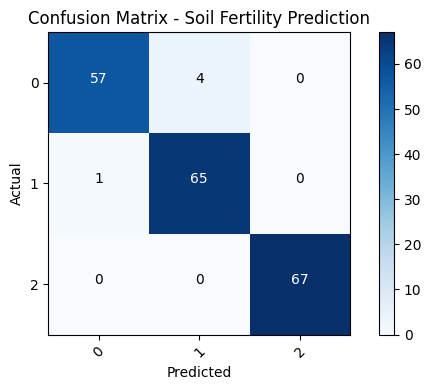

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Soil Fertility Prediction")
plt.colorbar()

tick_marks = np.arange(len(le.classes_))
plt.xticks(tick_marks, le.classes_, rotation=45)
plt.yticks(tick_marks, le.classes_)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


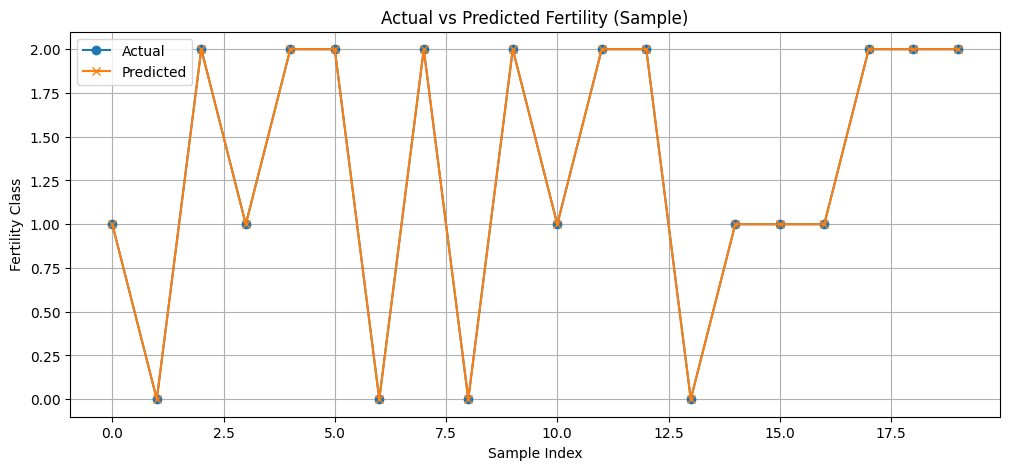

In [21]:
sample_size = 20

plt.figure(figsize=(12,5))
plt.plot(
    le.inverse_transform(y_test[:sample_size]),
    label="Actual",
    marker="o"
)
plt.plot(
    le.inverse_transform(y_test_pred[:sample_size]),
    label="Predicted",
    marker="x"
)

plt.title("Actual vs Predicted Fertility (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Fertility Class")
plt.legend()
plt.grid(True)
plt.show()


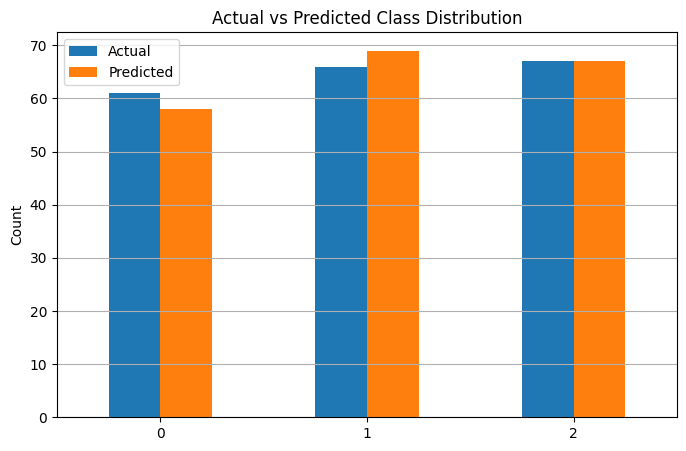

In [22]:
actual_counts = pd.Series(le.inverse_transform(y_test)).value_counts()
predicted_counts = pd.Series(le.inverse_transform(y_test_pred)).value_counts()

df_plot = pd.DataFrame({
    "Actual": actual_counts,
    "Predicted": predicted_counts
}).fillna(0)

df_plot.plot(kind="bar", figsize=(8,5))
plt.title("Actual vs Predicted Class Distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


In [23]:
# Example new soil samples (replace with real values)
new_samples = np.array([
    X_test[0],   # using test data as example
    X_test[1],
    X_test[2]
])

new_predictions = rf_model.predict(new_samples)

for i, pred in enumerate(new_predictions):
    print(f"Sample {i+1} → Predicted Fertility:",
          le.inverse_transform([pred])[0])


Sample 1 → Predicted Fertility: 1
Sample 2 → Predicted Fertility: 0
Sample 3 → Predicted Fertility: 2


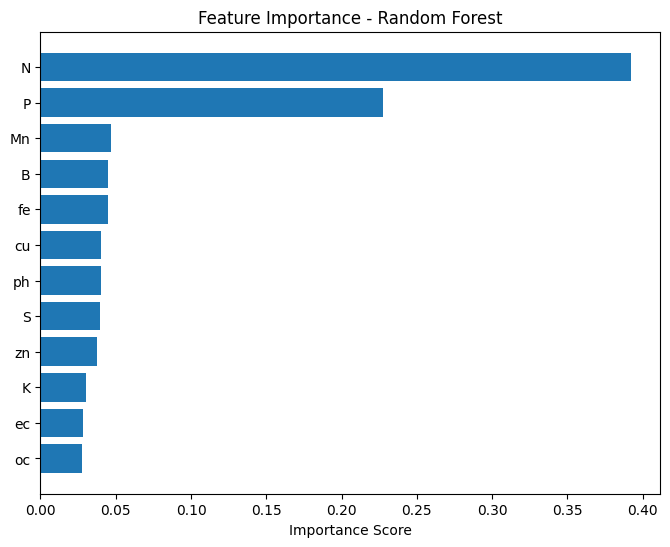

In [24]:
importance_df = pd.DataFrame({
    "Feature": data.drop(columns=[target_column]).columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(8,6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()
